In [2]:
!pip install kaggle

from google.colab import files
files.upload()   # upload kaggle.json

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving archive.zip to archive.zip


In [3]:
!unzip /content/archive.zip -d data

Archive:  /content/archive.zip
  inflating: data/customer_churn_dataset-testing-master.csv  
  inflating: data/customer_churn_dataset-training-master.csv  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_sql('hackathon.db')

In [6]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [7]:
df.dtypes

,0
CustomerID,float64
Age,float64
Gender,object
Tenure,float64
Usage Frequency,float64
Support Calls,float64
Payment Delay,float64
Subscription Type,object
Contract Length,object
Total Spend,float64


In [8]:
df.isna().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [9]:
df.loc[df['CustomerID'].isna()]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.dropna(inplace=True)


In [11]:
df.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


<Axes: ylabel='Density'>

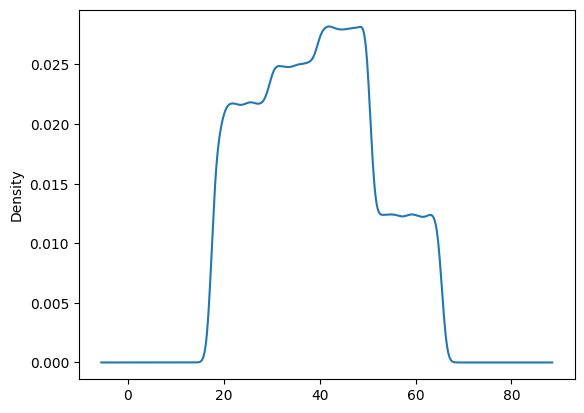

In [14]:
df['Age'].plot(kind='kde')

In [15]:
df['Churn'].value_counts()

,count
Churn,
1.0,249999
0.0,190833


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 43.7+ MB


<Axes: xlabel='Gender,Churn'>

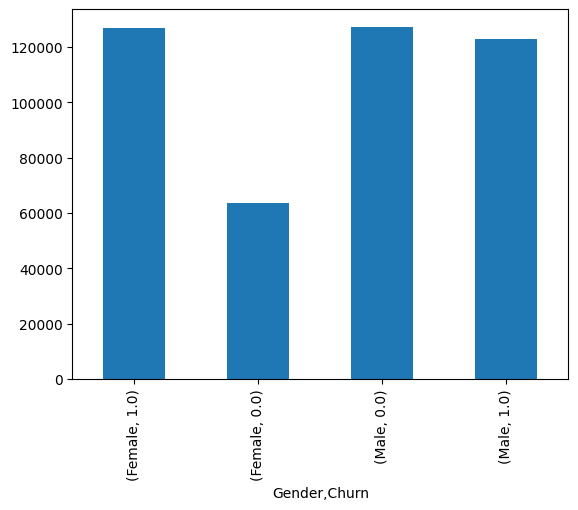

In [17]:
df.groupby('Gender')['Churn'].value_counts().plot(kind='bar')

In [18]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [19]:
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col not in ['Tenure', 'CustomerID']]
cat_cols = [col for col in df.columns if col not in num_cols]

In [20]:
num_cols , cat_cols

(['Age',
  'Usage Frequency',
  'Support Calls',
  'Payment Delay',
  'Total Spend',
  'Last Interaction',
  'Churn'],
 ['CustomerID', 'Gender', 'Tenure', 'Subscription Type', 'Contract Length'])

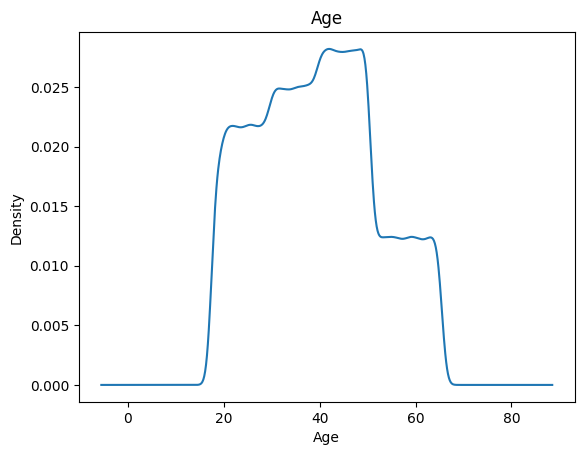

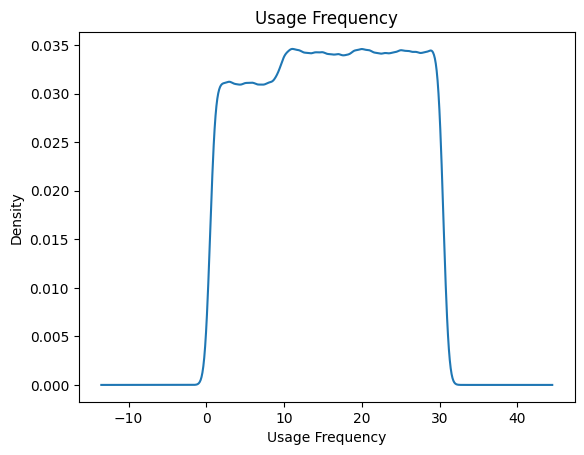

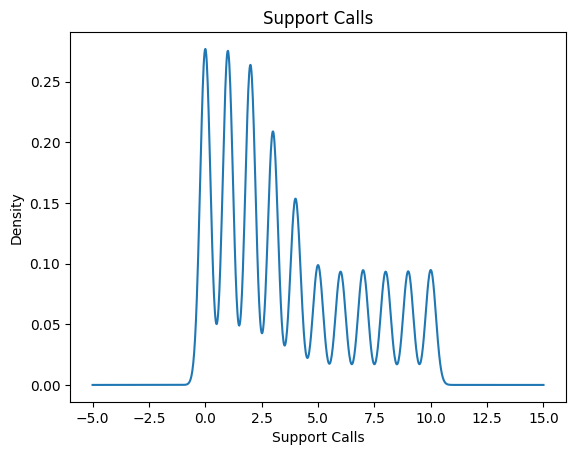

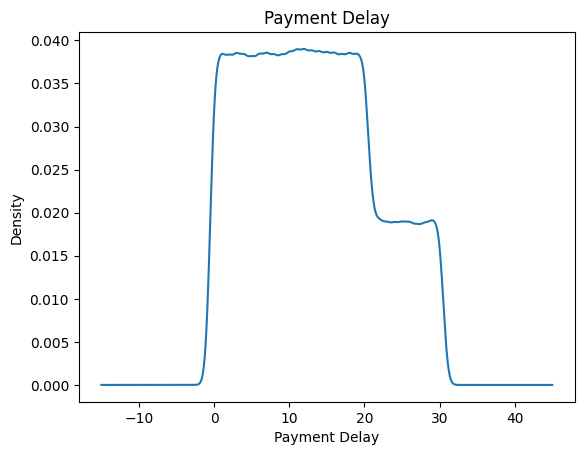

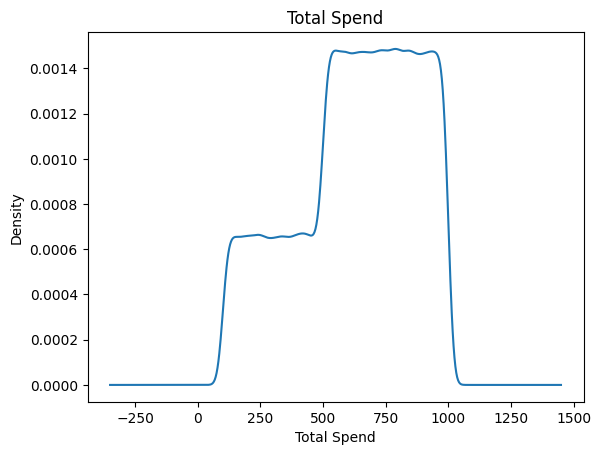

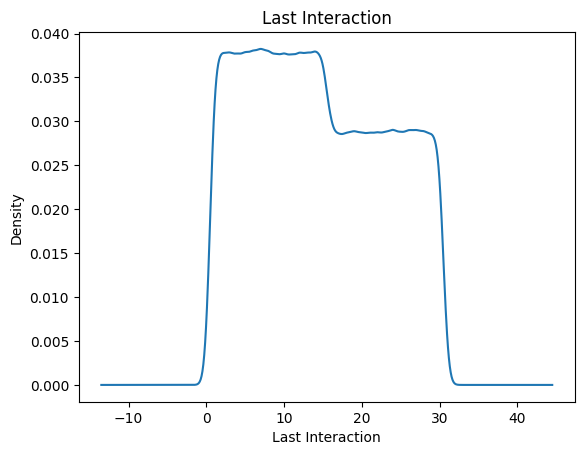

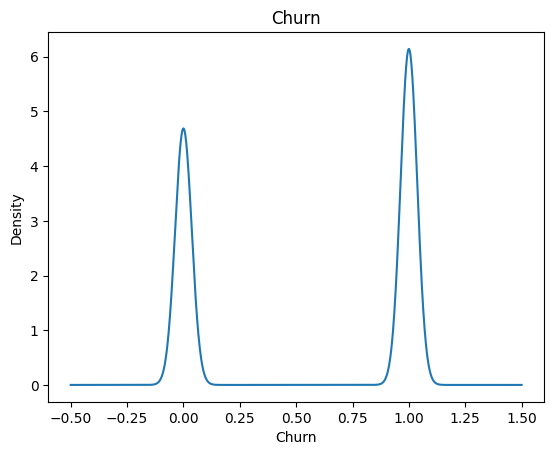

In [21]:
for col in num_cols:
  plt.title(col)
  plt.xlabel(col)
  df[col].plot(kind='kde' , xlabel= col)
  plt.show()

<Axes: >

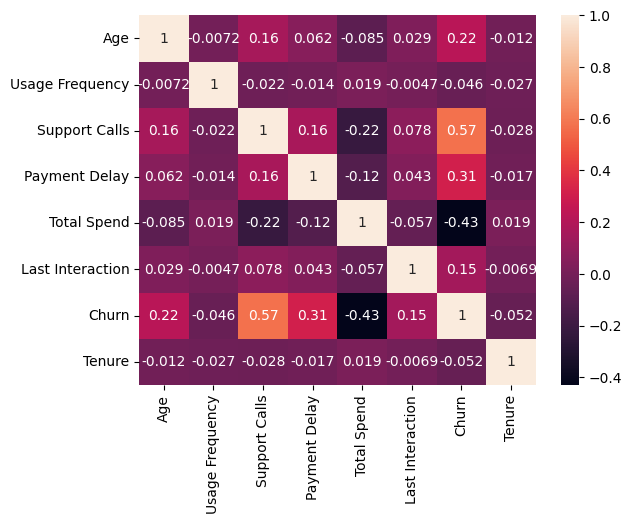

In [22]:
sns.heatmap(df[num_cols + ['Tenure']].corr(), annot=True)

In [23]:
df[num_cols].corr()

,Age,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
Age,1.000000,-0.007190,0.158451,0.061738,-0.084684,0.028980,0.218394
Usage Frequency,-0.007190,1.000000,-0.022013,-0.014470,0.018631,-0.004662,-0.046101
Support Calls,0.158451,-0.022013,1.000000,0.162889,-0.221594,0.077684,0.574267
Payment Delay,0.061738,-0.014470,0.162889,1.000000,-0.121044,0.042708,0.312129
Total Spend,-0.084684,0.018631,-0.221594,-0.121044,1.000000,-0.056890,-0.429355
Last Interaction,0.028980,-0.004662,0.077684,0.042708,-0.056890,1.000000,0.149616
Churn,0.218394,-0.046101,0.574267,0.312129,-0.429355,0.149616,1.000000


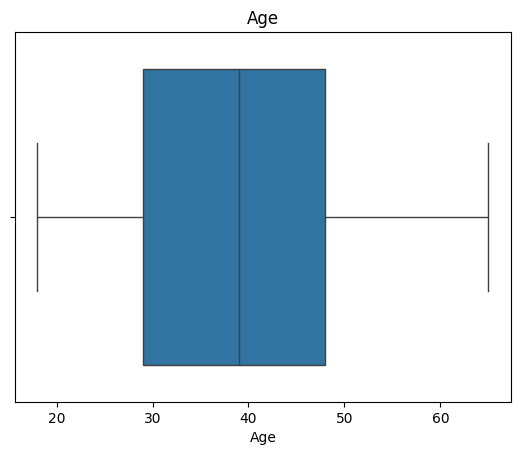

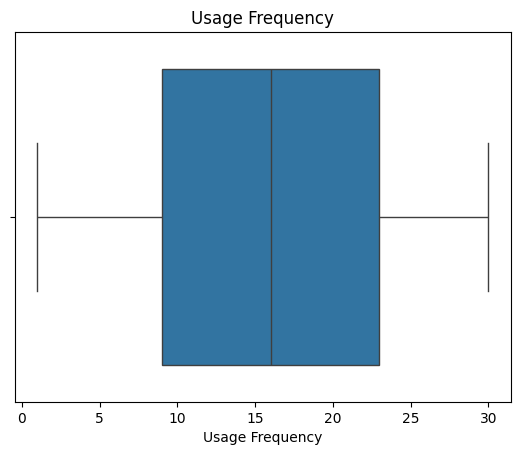

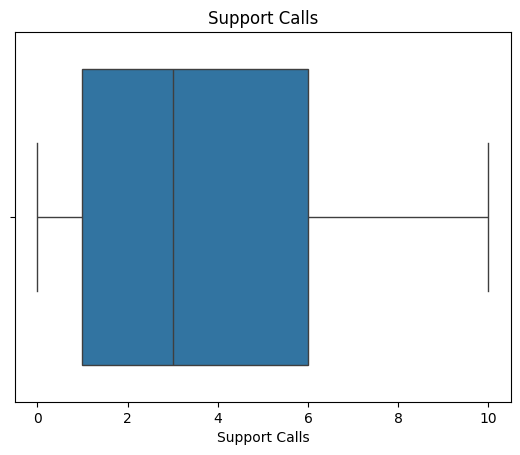

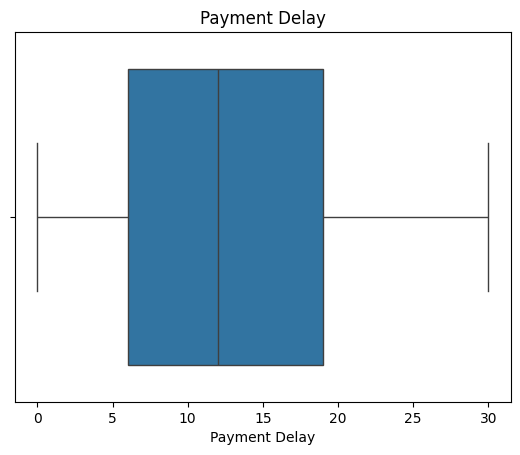

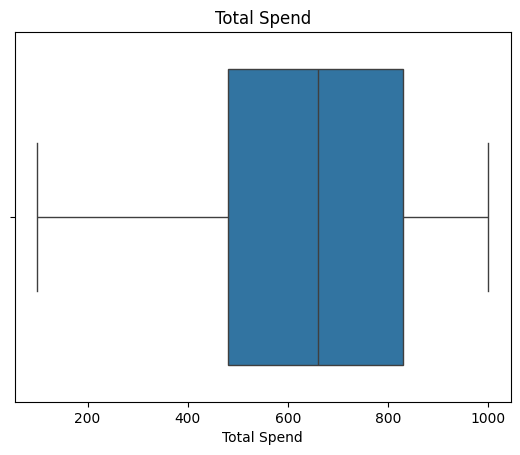

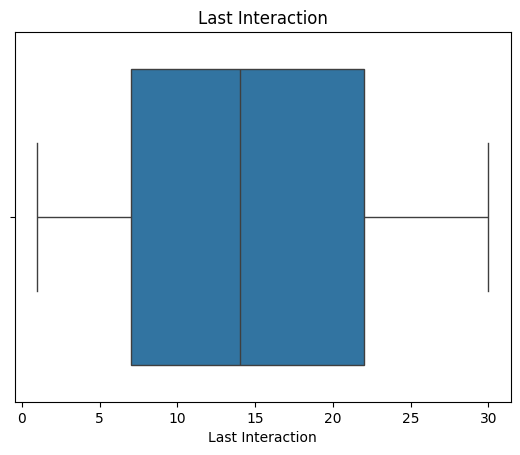

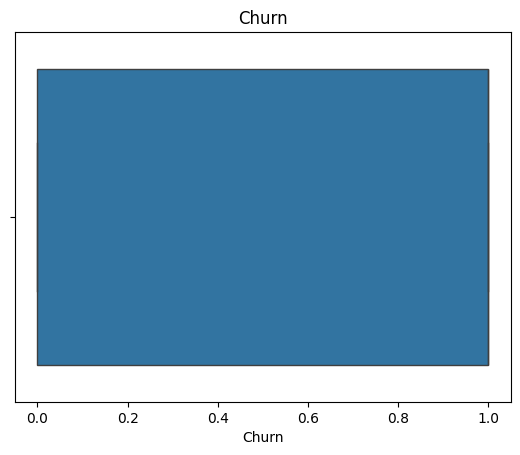

In [24]:
for col in num_cols :
  plt.title(col)
  plt.xlabel(col)
  sns.boxplot(x=df[col])
  plt.show()

In [25]:
df['Engagement_score']=df["Usage Frequency"]-df["Payment Delay"]-df["Support Calls"]

In [26]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Engagement_score
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,-9.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,-17.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,-20.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,7.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,7.0


<Axes: ylabel='Density'>

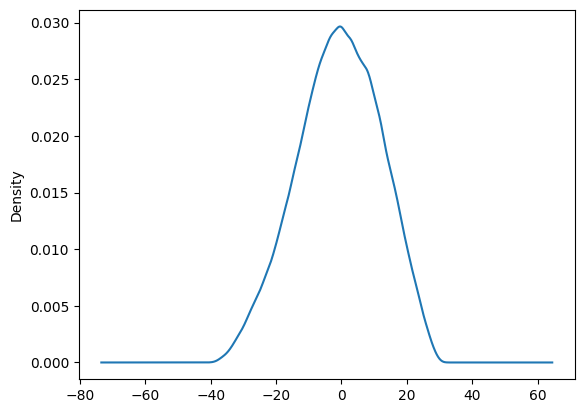

In [27]:
df['Engagement_score'].plot(kind = 'kde')

In [28]:
df["Risk_score"] = df["Payment Delay"] * df["Support Calls"]
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Engagement_score,Risk_score
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,-9.0,90.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,-17.0,80.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,-20.0,108.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,7.0,49.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,7.0,40.0


<Axes: ylabel='Density'>

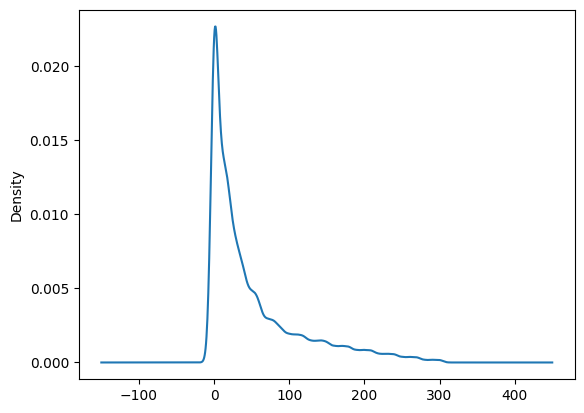

In [29]:
df['Risk_score'].plot(kind = 'kde')

In [30]:
map_contract = {"Monthly": 1, "Quarterly": 3, "Annual": 12}
df["contract_length_num"] = df["Contract Length"].map(map_contract)
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Engagement_score,Risk_score,contract_length_num
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,-9.0,90.0,12
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,-17.0,80.0,1
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,-20.0,108.0,3
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,7.0,49.0,1
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,7.0,40.0,1


In [31]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [32]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Engagement_score,Risk_score,contract_length_num
0,2.0,30.0,0,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,-9.0,90.0,12
1,3.0,65.0,0,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,-17.0,80.0,1
2,4.0,55.0,0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,-20.0,108.0,3
3,5.0,58.0,1,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,7.0,49.0,1
4,6.0,23.0,1,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,7.0,40.0,1


In [33]:
df["spend_per_month"] = df["Total Spend"] / df["contract_length_num"]

In [34]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Engagement_score,Risk_score,contract_length_num,spend_per_month
0,2.0,30.0,0,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,-9.0,90.0,12,77.666667
1,3.0,65.0,0,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,-17.0,80.0,1,557.000000
2,4.0,55.0,0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,-20.0,108.0,3,61.666667
3,5.0,58.0,1,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,7.0,49.0,1,396.000000
4,6.0,23.0,1,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,7.0,40.0,1,617.000000


<Axes: xlabel='Subscription Type,Churn'>

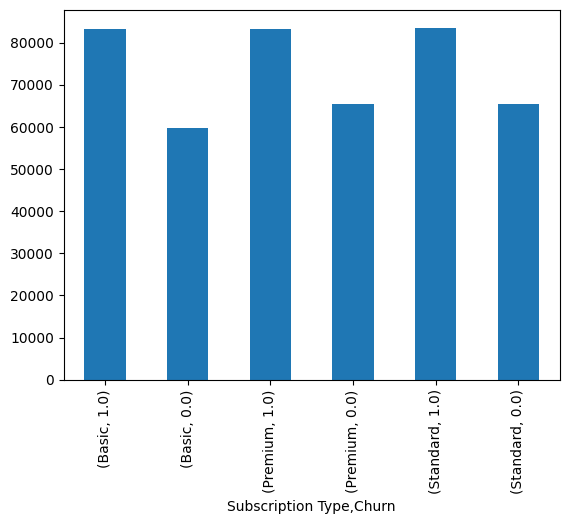

In [35]:
df.groupby('Subscription Type')['Churn'].value_counts().plot(kind='bar')

In [36]:
df = pd.get_dummies(df, columns=['Subscription Type'])

In [37]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Contract Length,Total Spend,Last Interaction,Churn,Engagement_score,Risk_score,contract_length_num,spend_per_month,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard
0,2.0,30.0,0,39.0,14.0,5.0,18.0,Annual,932.0,17.0,1.0,-9.0,90.0,12,77.666667,False,False,True
1,3.0,65.0,0,49.0,1.0,10.0,8.0,Monthly,557.0,6.0,1.0,-17.0,80.0,1,557.000000,True,False,False
2,4.0,55.0,0,14.0,4.0,6.0,18.0,Quarterly,185.0,3.0,1.0,-20.0,108.0,3,61.666667,True,False,False
3,5.0,58.0,1,38.0,21.0,7.0,7.0,Monthly,396.0,29.0,1.0,7.0,49.0,1,396.000000,False,False,True
4,6.0,23.0,1,32.0,20.0,5.0,8.0,Monthly,617.0,20.0,1.0,7.0,40.0,1,617.000000,True,False,False


In [38]:
df.drop(columns= ['Contract Length'] , inplace= True )

In [39]:
df['Subscription Type_Basic']=df['Subscription Type_Basic'].astype(int)
df['Subscription Type_Premium']=df['Subscription Type_Premium'].astype(int)
df['Subscription Type_Standard']=df['Subscription Type_Standard'].astype(int)

In [40]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Engagement_score,Risk_score,contract_length_num,spend_per_month,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard
0,2.0,30.0,0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,-9.0,90.0,12,77.666667,0,0,1
1,3.0,65.0,0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,-17.0,80.0,1,557.000000,1,0,0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,-20.0,108.0,3,61.666667,1,0,0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,396.0,29.0,1.0,7.0,49.0,1,396.000000,0,0,1
4,6.0,23.0,1,32.0,20.0,5.0,8.0,617.0,20.0,1.0,7.0,40.0,1,617.000000,1,0,0


In [41]:
X = df.drop(columns=['CustomerID' , 'Tenure'])
y = df['Tenure']

In [42]:
X.head()

,Age,Gender,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Engagement_score,Risk_score,contract_length_num,spend_per_month,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard
0,30.0,0,14.0,5.0,18.0,932.0,17.0,1.0,-9.0,90.0,12,77.666667,0,0,1
1,65.0,0,1.0,10.0,8.0,557.0,6.0,1.0,-17.0,80.0,1,557.000000,1,0,0
2,55.0,0,4.0,6.0,18.0,185.0,3.0,1.0,-20.0,108.0,3,61.666667,1,0,0
3,58.0,1,21.0,7.0,7.0,396.0,29.0,1.0,7.0,49.0,1,396.000000,0,0,1
4,23.0,1,20.0,5.0,8.0,617.0,20.0,1.0,7.0,40.0,1,617.000000,1,0,0


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [44]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [45]:
scaler = StandardScaler()
for col in ['Age','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction','Engagement_score','Risk_score','contract_length_num','spend_per_month']:
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

In [46]:
X_train.head()

,Age,Gender,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Engagement_score,Risk_score,contract_length_num,spend_per_month,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard
321745,-1.234718,1,1.419341,-1.173301,-1.086163,0.139639,1.689759,0.0,1.940859,-0.807394,1.207144,-0.737235,1,0,0
175119,-1.234718,1,-0.443767,-0.847672,1.578104,0.508215,-0.287785,1.0,-1.116092,-0.394602,-0.671678,0.153838,1,0,0
272448,-1.716941,1,-0.909544,-1.173301,-0.722854,0.918640,-0.636763,0.0,0.138042,-0.807394,-0.671678,0.303731,0,1,0
66769,-0.270271,0,-0.793100,-0.522042,1.214794,0.524821,-1.334720,1.0,-1.194475,-0.077070,-1.089194,2.458487,0,1,0
70297,1.417510,0,1.186452,1.431737,0.245970,0.234211,-0.520437,1.0,0.294808,1.097800,-1.089194,2.140082,1,0,0


In [47]:
X_test.head()

,Age,Gender,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Engagement_score,Risk_score,contract_length_num,spend_per_month,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard
159565,-1.315089,0,0.022010,1.431737,0.367073,-0.176794,-0.171459,1.0,-0.567408,1.224813,-0.671678,-0.096338,0,1,0
127464,-0.511383,1,0.487787,-1.173301,1.093691,-1.966122,-0.287785,1.0,-0.097108,-0.807394,-0.671678,-0.749827,1,0,0
22398,-0.993606,0,-1.491765,-1.173301,1.335897,1.176618,1.340781,1.0,-1.586392,-0.807394,1.207144,-0.642555,0,0,1
99337,-0.350642,0,0.837119,0.454848,0.003764,-1.235445,1.689759,1.0,0.451575,0.224586,1.207144,-0.862785,1,0,0
300997,-0.913236,1,1.652229,-0.522042,-0.965060,-0.260407,0.061194,0.0,1.862475,-0.648628,1.207144,-0.773760,1,0,0


In [48]:
y_train.head()

,Tenure
321745,58.0
175119,26.0
272448,36.0
66769,18.0
70297,27.0


In [49]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01, max_iter=10000),
    'RandomForest': RandomForestRegressor(n_estimators=200, random_state=42),
    'XGBRegressor': XGBRegressor(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        random_state=42
    )
}

In [50]:
for model in models.values():
  model.fit(X_train , y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test , y_pred)
  r2 = r2_score(y_test , y_pred)
  print(f'Model : {model} , MSE : {mse} , R2 : {r2}')
  print('-'*50)


Model : LinearRegression() , MSE : 297.58252079624646 , R2 : 0.004472886120635899
--------------------------------------------------
Model : Ridge() , MSE : 297.5825221297218 , R2 : 0.004472881659651873
--------------------------------------------------
Model : Lasso(alpha=0.01, max_iter=10000) , MSE : 297.5901419416417 , R2 : 0.00444739048043663
--------------------------------------------------
Model : RandomForestRegressor(n_estimators=200, random_state=42) , MSE : 305.0338719370626 , R2 : -0.020454727490102798
--------------------------------------------------
Model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learn

In [52]:
import joblib
joblib.dump(models['XGBRegressor'], 'xgb_model_updated.pkl')

['xgb_model_updated.pkl']

In [56]:
for model in models.values():
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  mse_train = mean_squared_error(y_train , y_train_pred)
  r2_train = r2_score(y_train , y_train_pred)
  mae_train = mean_absolute_error(y_train , y_train_pred)

  print(f'Model : {model}')
  print(f'Train : MSE : {mse_train} , R2 : {r2_train} , MAE : {mae_train}')
  print('-'*50)


Model : LinearRegression()
Train : MSE : 296.1617882122152 , R2 : 0.004394590253577468 , MAE : 14.848145574797837
--------------------------------------------------
Model : Ridge()
Train : MSE : 296.161788212627 , R2 : 0.004394590252192798 , MAE : 14.848145896105576
--------------------------------------------------
Model : Lasso(alpha=0.01, max_iter=10000)
Train : MSE : 296.167235038273 , R2 : 0.00437627968920018 , MAE : 14.849133010901227
--------------------------------------------------
Model : RandomForestRegressor(n_estimators=200, random_state=42)
Train : MSE : 41.803250719308686 , R2 : 0.8594702482978418 , MAE : 5.51635516708491
--------------------------------------------------
Model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_we